<b>Jugal Krishna Kakarla 

USC ID: 8576569220</b>

In [1]:
# Import Packages

import numpy as np
import pandas as pd
import sklearn
import math
from sklearn.neighbors import NearestCentroid
from sklearn import svm
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.dummy import DummyClassifier
import seaborn

In [2]:
# Import Datasets

train_data = pd.read_csv('algerian_fires_train.csv') # Train dataset
test_data = pd.read_csv('algerian_fires_test.csv') # Test dataset

# Preprocessing:

In [3]:
# Function to Normalize the dataset

def Normalize(tr_dataset, test_dataset):

    """
    :param tr_dataset :  Training dataset to be normalized (Dataframe)
    :param test_dataset : Test dataset to be normalized (Dataframe)
    :return: Normalized Dataset (Dataframe)
    """

    scaler = StandardScaler() # Initialize standard scaler
    
    dataset1 = tr_dataset.drop(columns=['Date', 'Classes']) # Drop the date and classes of i/p dataset
    col_names = list(dataset1.columns) # Get list of column names
    scaler.fit(dataset1) # Standardization
    
    tr_dataset_n = scaler.transform(dataset1)
    tr_dataset_n = pd.DataFrame(tr_dataset_n, columns=col_names) # Convert into dataframe
    tr_dataset_n['Classes'] = tr_dataset['Classes'] # Add classes column
    tr_dataset_n['Date'] = tr_dataset['Date'] # Add date column
    temp_cols=tr_dataset_n.columns.tolist() # List of input dataset columns
    new_cols=temp_cols[-1:] + temp_cols[:-1] # Reorder columns
    tr_dataset_n=tr_dataset_n[new_cols]
    
    dataset1 = test_dataset.drop(columns=['Date', 'Classes']) # Drop the date and classes of i/p dataset
    test_dataset_n = scaler.transform(dataset1)
    test_dataset_n = pd.DataFrame(test_dataset_n, columns=col_names) # Convert into dataframe
    test_dataset_n['Classes'] = test_dataset['Classes'] # Add classes column
    test_dataset_n['Date'] = test_dataset['Date'] # Add date column
    temp_cols=test_dataset_n.columns.tolist() # List of input dataset columns
    new_cols=temp_cols[-1:] + temp_cols[:-1] # Reorder columns
    test_dataset_n=test_dataset_n[new_cols]
    
    return tr_dataset_n, test_dataset_n

In [4]:
# Feature engineering

# Add n day avg columns features

def add_n_dayavg(tr_dataset, test_dataset, col_names, n_days = 3):
    
    """
    
    :param tr_dataset: Train dataset (Dataframe)
    :param test_dataset: Test dataset (Dataframe)
    :param col_names: Column names of dataset to compute the n_day rolling averages for (list of str)
    :param n_days: Number of days (int, default=3)
    :param dataset_type: Type of dataset (str, default='train')
    :return: Dataset with new n_day avg columns of the columns in col_names added to it
    """
    n_tr = len(tr_dataset) # Length of train dataset
    n_test = len(test_dataset) # Length of test dataset
    l_rows = tr_dataset.iloc[n_tr-3:n_tr] # Take last 3 rows of train data
    test_dataset = pd.concat([l_rows, test_dataset]).reset_index(drop = True) # Add last 3 rows of train data to test data 
    tr_dataset = tr_dataset.drop(labels=range(n_tr-3,n_tr), axis=0) # Remove last 3 rows of train data
    n_tr = len(tr_dataset) # update length of training dataset
    n_test = len(test_dataset) # update length of test dataset
    
    # Add new featured columns to training set
    for col_name in col_names:
        col = tr_dataset[col_name]
        new_col = list(col[0:n_days])
        for i in range(n_days, len(col)):
            new_col.append(np.mean(col[i-n_days:i]))
        tr_dataset['3_day_avg_' + col_name] = new_col
    
    # Add new featured columns to test set
    for col_name in col_names:
        col = test_dataset[col_name]
        new_col = list(col[0:n_days])
        for i in range(n_days, len(col)):
            new_col.append(np.mean(col[i-n_days:i]))
        test_dataset['3_day_avg_' + col_name] = new_col
    test_dataset = test_dataset.drop(labels=range(0,3), axis=0) # Remove first 3 rows of test set
    
    return tr_dataset, test_dataset

# Apply feature engineering

new_tr_data = train_data.copy() # Initialize featured train data
new_test_data = test_data.copy() # Initialize featured test data
col_names = [test_data.columns] # List of column names
col_names = col_names[0][1:-2] # Exclude date and classes
new_tr_data, new_test_data = add_n_dayavg(new_tr_data,new_test_data, col_names, n_days = 3) # Featured datasets


# Helper Functions:

In [5]:
# Function to Evaluate model performance on test set

def evaluate(model, train_dataset, test_dataset):
    """
    
    :param model: Model whose performance is to be evaluated
    :param train_dataset: Training dataset (Dataframe)
    :param test_dataset: Test dataset (Dataframe)
    :return: Accuracy on test dataset
    """
    
    tr_data = np.array(train_dataset.drop(columns=['Date', 'Classes'])) # Input training features
    z1 = np.array(train_dataset['Classes']) # Training classes

    test_data = np.array(test_dataset.drop(columns=['Date', 'Classes'])) # Input test features
    z2 = np.array(test_dataset['Classes']) # Test classes

    model.fit(tr_data, z1) # Train model
    pred_classes = model.predict(test_data) # Use model for prediction on test data
    accuracy = accuracy_score(pred_classes, z2) # Accuracy

    return accuracy, pred_classes

# Models:

# NMC (Baseline model):

NMC without feature engineering:

Accuracy on test set = 78.33333333333333%
F1 score = 0.6285714285714286


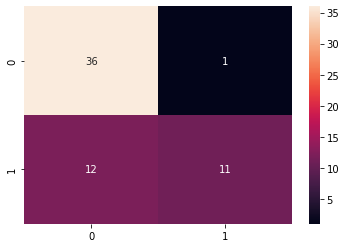

In [6]:
# NMC Classifier

classifier = NearestCentroid() # Initialize the classifier
tr_data1 = np.array(train_data.drop(columns=['Date','Classes'])) # Train features
z1 = np.array(train_data['Classes']) # Train classes
classifier.fit(tr_data1, z1) # Train the classifier
test_data1 = np.array(test_data.drop(columns=['Date','Classes'])) # Test features
z2 = np.array(test_data['Classes']) # Test Classes
classes = classifier.predict(test_data1) # Predicted classes
print(f'Accuracy on test set = {classifier.score(test_data1, z2)*100}%') # Accuracy
print(f'F1 score = {f1_score(z2, classes)}') # F1 score
conf_mat = confusion_matrix(z2, classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy on train set = 74.45652173913044%
F1 score = 0.7661691542288558


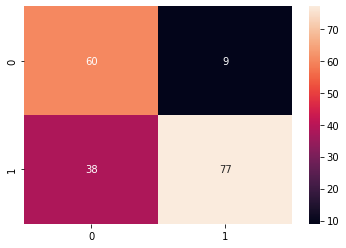

In [7]:
# Performance metrics on train set

classes = classifier.predict(tr_data1) # Predicted classes
print(f'Accuracy on train set = {classifier.score(tr_data1, z1)*100}%') # Accuracy
print(f'F1 score = {f1_score(z1, classes)}') # F1 score
conf_mat = confusion_matrix(z1, classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

With Normalization:

Accuracy on test set = 81.66666666666667%
F1 score = 0.7027027027027025


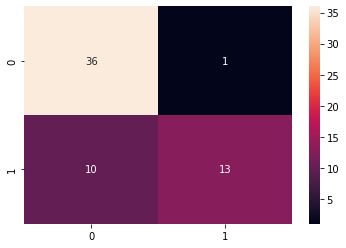

In [8]:
# NMC Classifier with Normalization

tr_dataset, test_dataset = Normalize(train_data, test_data) 

classifier = NearestCentroid() # Initialize the classifier
tr_data1 = np.array(tr_dataset.drop(columns=['Date','Classes'])) # Train features
z1 = np.array(tr_dataset['Classes']) # Train classes
classifier.fit(tr_data1, z1) # Train the classifier
test_data1 = np.array(test_dataset.drop(columns=['Date','Classes'])) # Test features
z2 = np.array(test_dataset['Classes']) # Test Classes
classes = classifier.predict(test_data1) # Predicted classes
print(f'Accuracy on test set = {classifier.score(test_data1, z2)*100}%') # Accuracy
print(f'F1 score = {f1_score(z2, classes)}') # F1 score
conf_mat = confusion_matrix(z2, classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy on train set = 88.04347826086956%
F1 score = 0.8981481481481481


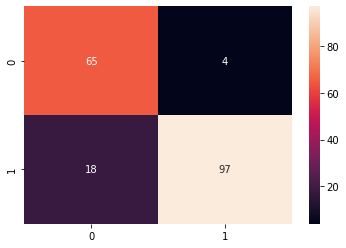

In [9]:
# Performance metrics on train set

z2 = np.array(tr_dataset['Classes']) # Train Classes
classes = classifier.predict(tr_data1) # Predicted classes
print(f'Accuracy on train set = {classifier.score(tr_data1, z2)*100}%') # Accuracy
print(f'F1 score = {f1_score(z2, classes)}') # F1 score
conf_mat = confusion_matrix(z2, classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

NMC with feature engineering:

Accuracy on test set = 73.33333333333333%
F1 score = 0.5555555555555555


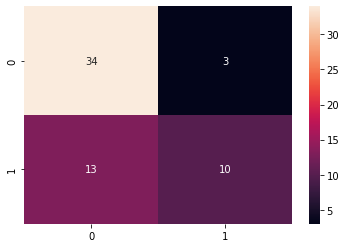

In [10]:
# NMC Classifier

classifier = NearestCentroid() # Initialize the classifier
tr_data1 = np.array(new_tr_data.drop(columns=['Date','Classes'])) # Train features
z1 = np.array(new_tr_data['Classes']) # Train classes
classifier.fit(tr_data1, z1) # Train the classifier
test_data1 = np.array(new_test_data.drop(columns=['Date','Classes'])) # Test features
z2 = np.array(new_test_data['Classes']) # Test Classes
classes = classifier.predict(test_data1) # Predicted classes
print(f'Accuracy on test set = {classifier.score(test_data1, z2)*100}%') # Accuracy
print(f'F1 score = {f1_score(z2, classes)}') # F1 score
conf_mat = confusion_matrix(z2, classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy on train set = 71.27071823204419%
F1 score = 0.7319587628865979


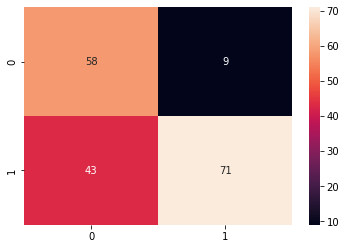

In [11]:
# Performance metrics on train set

classes = classifier.predict(tr_data1) # Predicted classes
print(f'Accuracy on train set = {classifier.score(tr_data1, z1)*100}%') # Accuracy
print(f'F1 score = {f1_score(z1, classes)}') # F1 score
conf_mat = confusion_matrix(z1, classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

# SVM:

In [12]:
# K-fold cross validation for SVM

def k_fold_CV_SVM(dataset, C, kernel, gamma, degree, k=10, drop=3):
    """

    :param dataset: Training dataset (Dataframe)
    :param C: List of C values to be evaluated (list of int)
    :param kernel: List of kernel types to be evaluated (list of str)
    :param gamma: List of gamma values to be evaluated (list of str or int)
    :param degree: List of degeree values to be evaluated (list of int)
    :param k: num of folds (int, default=10)
    :param drop: Number of samples to be dropped, equal to n_days in add_n_dayavg (default=3)
    :return: fin_acc, acc_opt, C_opt, gamma_opt, degree_opt, kernel_opt i.e, optimum hyperparameters
    """
    
    n = round(len(dataset) / k) # Length of each batch
    fin_acc = [] # Save final accuracies after each search
    acc_opt = 0 # Initialize optimum accuracy
    C_opt = 0 # Initialize optimum C
    gamma_opt = 0.1 # Initialize optimum gamma
    degree_opt = 1 # Initialize optimum degree
    kernel_opt = 'rbf' # Initialize optimum kernel
    
    # Start search
    for c in C:
        for ker in kernel:
            for gam in gamma:
                for deg in degree:
                    model = svm.SVC(C=c, kernel=ker, gamma=gam, degree=deg) # Initialize model
                    accuracy = [] # Accuracy per fold
                    # Split the data to train and val datasets
                    for i in range(0, k): 
                        val_dataset = dataset.iloc[i * n:(i + 1) * n]
                        tr_dataset = dataset.drop(range(i * n, (i + 1) * n))
                        if i != 0 and drop != 0:
                            tr_dataset = tr_dataset.drop(range(i * n - drop, i * n))
                        acc, pred_classes = evaluate(model, tr_dataset, val_dataset) # Train and evaluate the model
                        accuracy.append(acc)
                    fin_acc.append(np.mean(accuracy)) 
                    # Update optimum parameters if accuracy improves
                    if np.mean(accuracy) > acc_opt:
                        acc_opt = np.mean(accuracy)
                        C_opt = c
                        gamma_opt = gam
                        degree_opt = deg
                        kernel_opt = ker
    return fin_acc, acc_opt, C_opt, gamma_opt, degree_opt, kernel_opt


Without Feature engineering:

In [13]:
# Original dataset

tr_dataset = train_data
test_dataset = test_data

In [14]:
# Train the model

C1 = [0.01, 0.5, 1,10] # List of C values for grid search
kernel1 = ['linear', 'rbf', 'poly', 'sigmoid'] # List of kernel values for grid search
gamma1 = ['scale', 'auto'] # List of gamma values for grid search
degree1 = [1,2,3,4] # List of degree values for grid search

# Do K fold cross-validation
fin_acc1, acc_opt1, C_opt1, gamma_opt1, degree_opt1, kernel_opt1 = k_fold_CV_SVM(tr_dataset, 
                                                                       C1, kernel1, 
                                                                       gamma1, degree1, 
                                                                       k=10, drop = 0)

In [15]:
# Print the optimum parameters

print(f"""The optimum model validation accuracy = {acc_opt1*100}% and the optimum hyperparameters are as follows: \n 
      Kernel = {kernel_opt1},
      C = {C_opt1},
      Gamma = {gamma_opt1},
      Degree = {degree_opt1}""")

The optimum model validation accuracy = 92.77777777777777% and the optimum hyperparameters are as follows: 
 
      Kernel = linear,
      C = 0.01,
      Gamma = scale,
      Degree = 1


Performance metrics on training data:
Accuracy of Optimum model before feature engineering: 92.93478260869566% 
F1 score = 0.9422222222222223


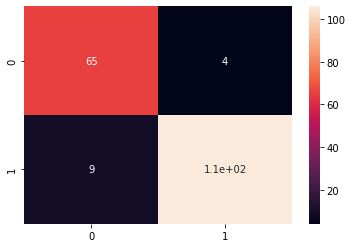

In [16]:
# Performance metrics on training set 

opt_model = svm.SVC(C=C_opt1, gamma=gamma_opt1, kernel = kernel_opt1, degree=degree_opt1) # Call optimum model

true_classes = train_data['Classes'] # Labels
accuracy, pred_classes = evaluate(opt_model, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy of Optimum model on test set before feature engineering: 88.33333333333333% 
F1 score = 0.8372093023255814


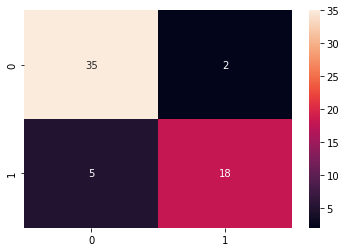

In [17]:
# Evaluate the model 

opt_model = svm.SVC(C=C_opt1, gamma=gamma_opt1, kernel = kernel_opt1, degree=degree_opt1) # Call optimum model

true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(opt_model, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

With Normalization:

In [18]:
# With Normalization of datasets

tr_dataset, test_dataset = Normalize(train_data, test_data) 

In [19]:
# Train the model

C1 = [0.01, 0.5, 1,10] # List of C values for grid search
kernel1 = ['linear', 'rbf', 'poly', 'sigmoid'] # List of kernel values for grid search
gamma1 = ['scale', 'auto'] # List of gamma values for grid search
degree1 = [1,2,3,4] # List of degree values for grid search

# Do K fold cross-validation
fin_acc1, acc_opt1, C_opt1, gamma_opt1, degree_opt1, kernel_opt1 = k_fold_CV_SVM(tr_dataset, 
                                                                       C1, kernel1, 
                                                                       gamma1, degree1, 
                                                                       k=10, drop = 0)

In [20]:
# Print the optimum parameters

print(f"""The optimum model validation accuracy = {acc_opt1*100}% and the optimum hyperparameters are as follows: \n 
      Kernel = {kernel_opt1},
      C = {C_opt1},
      Gamma = {gamma_opt1},
      Degree = {degree_opt1}""")

The optimum model validation accuracy = 92.77777777777777% and the optimum hyperparameters are as follows: 
 
      Kernel = linear,
      C = 0.5,
      Gamma = scale,
      Degree = 1


Performance metrics on training data:
Accuracy of Optimum model before feature engineering: 94.02173913043478% 
F1 score = 0.9511111111111111


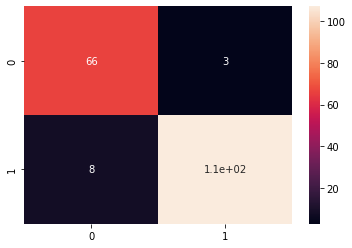

In [21]:
# Performance metrics on training set 

opt_model = svm.SVC(C=C_opt1, gamma=gamma_opt1, kernel = kernel_opt1, degree=degree_opt1) # Call optimum model

true_classes = train_data['Classes'] # Labels
accuracy, pred_classes = evaluate(opt_model, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy of Optimum model on test set before feature engineering: 90.0% 
F1 score = 0.8636363636363636


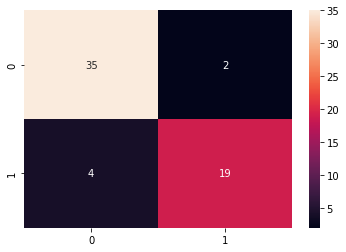

In [22]:
# Evaluate the model 

opt_model = svm.SVC(C=C_opt1, gamma=gamma_opt1, kernel = kernel_opt1, degree=degree_opt1) # Call optimum model

true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(opt_model, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

With feature engineering:

In [23]:
# featured data

tr_dataset = new_tr_data
test_dataset = new_test_data

In [24]:
# Train the model

C1 = [0.01, 0.5, 1,10] # List of C values for grid search
kernel1 = ['linear', 'rbf', 'poly', 'sigmoid'] # List of kernel values for grid search
gamma1 = ['scale', 'auto', 0.001, 0.1, 1, 2, 10] # List of gamma values for grid search
degree1 = [1,2,3,4] # List of degree values for grid search

# # Do K fold cross-validation
fin_acc2, acc_opt2, C_opt2, gamma_opt2, degree_opt2, kernel_opt2 = k_fold_CV_SVM(tr_dataset, 
                                                                       C1, kernel1, 
                                                                       gamma1, degree1, 
                                                                       k=10, drop = 3)

In [25]:
# Print the optimum parameters

print(f"""The optimum model validation accuracy = {acc_opt2*100}% and the optimum hyperparameters are as follows: \n 
      Kernel = {kernel_opt2},
      C = {C_opt2},
      Gamma = {gamma_opt2},
      Degree = {degree_opt2}""")

The optimum model validation accuracy = 90.0% and the optimum hyperparameters are as follows: 
 
      Kernel = poly,
      C = 0.5,
      Gamma = 0.1,
      Degree = 1


Performance metrics on training data:
Accuracy of Optimum model after feature engineering: 92.81767955801105% 
F1 score = 0.9427312775330398


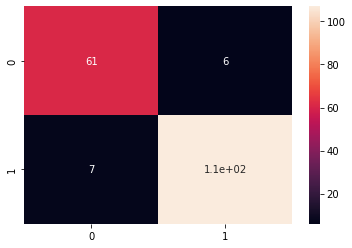

In [26]:
# Performance metrics on training set 

opt_model = svm.SVC(C=C_opt2, gamma=gamma_opt2, kernel = kernel_opt2, degree=degree_opt2) # Call optimum model

true_classes = train_data['Classes'][:-3] # Labels
accuracy, pred_classes = evaluate(opt_model, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model after feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy of Optimum model on test set after feature engineering: 91.66666666666666% 
F1 score = 0.888888888888889


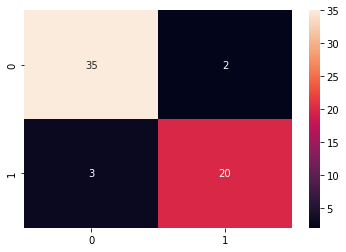

In [27]:
# Evaluate the model 

opt_model = svm.SVC(C=C_opt2, gamma=gamma_opt2, kernel = kernel_opt2, degree=degree_opt2) # Call optimum model

true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(opt_model, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set after feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

# Logistic Regression:

In [28]:
# K-fold cross validation for Logistic Regression

def k_CV_LogR(dataset, C, solvers, penalties, k=10, drop=3):
    """

    :param dataset: Training dataset (Dataframe)
    :param C: List of C values to be evaluated (list of int)
    :param solvers: List of solvers to be evaluated (list of str)
    :param penalties: List of penalties to be evaluated (list of str)
    :param k: num of folds (int, default=10)
    :param drop: Number of samples to be dropped, equal to n_days in add_n_dayavg (default=3)
    :return: fin_acc, acc_opt, c_opt, sol_opt, pen_opt i.e, optimum hyperparameters
    """
    n = round(len(dataset) / k) # Length of each batch
    fin_acc = [] # Save final accuracies after each search
    acc_opt = 0 # Initialize optimum accuracy
    c_opt = 0 # Initialize optimum C
    sol_opt = solvers[0] # Initialize optimum solver
    pen_opt = penalties[0] # Initialize optimum penalty
    
    # Start search
    for c in C:
        for sol in solvers:
            for pen in penalties:

                model = LogisticRegression(C=c, solver=sol, penalty=pen) # Initialize model
                accuracy = [] # Accuracy per fold
                # Split the data to train and val datasets
                for i in range(0, k):
                    val_dataset = dataset.iloc[i * n:(i + 1) * n]
                    tr_dataset = dataset.drop(range(i * n, (i + 1) * n))
                    if i != 0:
                        tr_dataset = tr_dataset.drop(range(i * n - drop, i * n))

                    acc, pred_classes = evaluate(model, tr_dataset, val_dataset) # Train and evaluate the model
                    accuracy.append(acc)
                fin_acc.append(np.mean(accuracy))
                # Update optimum parameters if accuracy improves
                if np.mean(accuracy) > acc_opt:
                    acc_opt = np.mean(accuracy)
                    c_opt = c
                    sol_opt = sol
                    pen_opt = pen

    return fin_acc, acc_opt, c_opt, sol_opt, pen_opt

Without Feature engineering:

In [29]:
# Original data

tr_dataset = train_data
test_dataset = test_data

In [30]:
# Train the model

C1 = [1,2,3,4] # List of C values for grid search
solvers1 = ['liblinear'] # Since 'liblinear' is good for small dataset
pens = ['l1','l2'] # List of penalties for grid search
fin_acc, acc_opt, c_opt, sol_opt, pen_opt = k_CV_LogR(tr_dataset, C=C1, solvers=solvers1,
                                                      penalties=pens, k=10, drop = 3)

In [31]:
# Print the optimum parameters

print(f"""The optimum model accuracy before feature engineering = {acc_opt*100} % and the optimum hyperparameters are as follows:
    
      Optimum C = {c_opt},
      Optimum Solver = {sol_opt},
      Optimum Penalty = {pen_opt}""")

The optimum model accuracy before feature engineering = 92.22222222222223 % and the optimum hyperparameters are as follows:
    
      Optimum C = 2,
      Optimum Solver = liblinear,
      Optimum Penalty = l1


Performance metrics on training data:
Accuracy of Optimum model before feature engineering: 93.47826086956522% 
F1 score = 0.9478260869565217


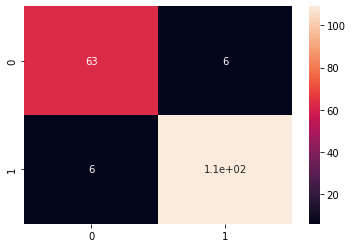

In [32]:
# Performance metrics on training set 

clf = LogisticRegression(C=c_opt, solver=sol_opt, penalty=pen_opt) # Call optimum model

true_classes = train_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy of Optimum model on test set before feature engineering: 90.0% 
F1 score = 0.8695652173913043


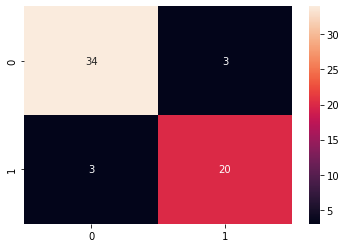

In [33]:
# Evaluate the model 

clf = LogisticRegression(C=c_opt, solver=sol_opt, penalty=pen_opt) # Call optimum model

true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

With Normalization:

In [34]:
# With Normalization of datasets

tr_dataset, test_dataset = Normalize(train_data, test_data) 

In [35]:
# Train the model

C1 = [1,2,3,4] # List of C values for grid search
solvers1 = ['liblinear'] # Since 'liblinear' is good for small dataset
pens = ['l1','l2'] # List of penalties for grid search
fin_acc, acc_opt, c_opt, sol_opt, pen_opt = k_CV_LogR(tr_dataset, C=C1, solvers=solvers1,
                                                      penalties=pens, k=10, drop = 3)

In [36]:
# Print the optimum parameters

print(f"""The optimum model accuracy before feature engineering = {acc_opt*100} % and the optimum hyperparameters are as follows:
    
      Optimum C = {c_opt},
      Optimum Solver = {sol_opt},
      Optimum Penalty = {pen_opt}""")

The optimum model accuracy before feature engineering = 92.22222222222223 % and the optimum hyperparameters are as follows:
    
      Optimum C = 2,
      Optimum Solver = liblinear,
      Optimum Penalty = l2


Performance metrics on training data:
Accuracy of Optimum model before feature engineering: 94.02173913043478% 
F1 score = 0.9511111111111111


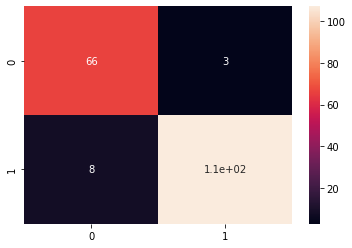

In [37]:
# Performance metrics on training set 

clf = LogisticRegression(C=c_opt, solver=sol_opt, penalty=pen_opt) # Call optimum model

true_classes = train_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy of Optimum model on test set before feature engineering: 91.66666666666666% 
F1 score = 0.8837209302325583


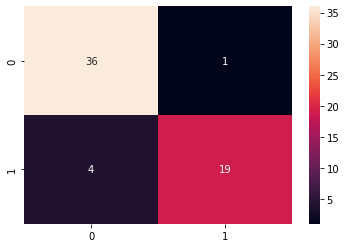

In [38]:
# Evaluate the model 

clf = LogisticRegression(C=c_opt, solver=sol_opt, penalty=pen_opt) # Call optimum model

true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

With Feature engineering:

In [39]:
# Featured data

tr_dataset = new_tr_data
test_dataset = new_test_data

In [40]:
# Train the model 

C1 = [1,2,3,4]  # List of C values for grid search
solvers1 = ['liblinear'] # Since 'liblinear' is good for small dataset
pens = ['l1','l2'] # List of penalties for grid search
fin_acc, acc_opt, c_opt, sol_opt, pen_opt = k_CV_LogR(tr_dataset, C=C1, solvers=solvers1,
                                                      penalties=pens, k=10, drop = 3)

In [41]:
# Print the optimum parameters

print(f"""The optimum model accuracy after feature engineering = {acc_opt*100} % and the optimum hyperparameters are as follows:
    
      Optimum C = {c_opt},
      Optimum Solver = {sol_opt},
      Optimum Penalty = {pen_opt}""")

The optimum model accuracy after feature engineering = 90.0 % and the optimum hyperparameters are as follows:
    
      Optimum C = 4,
      Optimum Solver = liblinear,
      Optimum Penalty = l1


Performance metrics on training data:
Accuracy of Optimum model after feature engineering: 93.37016574585635% 
F1 score = 0.9469026548672567


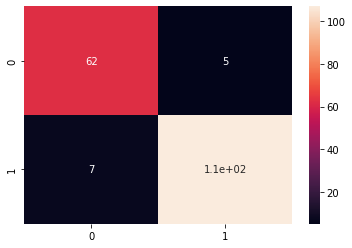

In [42]:
# Performance metrics on training set 

clf = LogisticRegression(C=c_opt, solver=sol_opt, penalty=pen_opt) # Call optimum model

true_classes = train_data['Classes'][:-3] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model after feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy of Optimum model on test set after feature engineering: 91.66666666666666% 
F1 score = 0.888888888888889


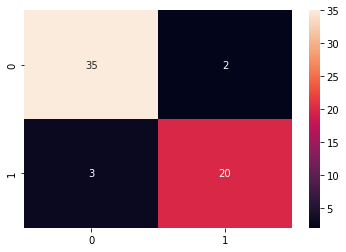

In [43]:
# Evaluate the model 

clf = LogisticRegression(C=c_opt, solver=sol_opt, penalty=pen_opt) # Call optimum model

true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set after feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

# Random Forest:

In [44]:
# K-fold cross validation for Random forest

def k_CV_RF(dataset, n_estimators, max_depths, random_state, k=10, drop=3):
    """

    :param dataset: Training dataset (Dataframe)
    :param max_depth: List of max_depth values to be evaluated (list of int)
    :param random_state: List of random_states to be evaluated (list of int)
    :param k: num of folds (int, default=10)
    :param drop: Number of samples to be dropped, equal to n_days in add_n_dayavg (default=3)
    :return: fin_acc, acc_opt, d_opt, rs_opt ,i.e, optimum hyperparameters
    """
    n = round(len(dataset) / k) # Length of each fold 
    fin_acc = [] # Final accuracies per parameter 
    acc_opt=0 # Final optimum accuracy
    n_est_opt = 0 # Optimum n_estimators
    d_opt = 0 # Optimum max_depths
    rs_opt = 0 # Optimum random_state
    
    # Start search
    for n_estimator in n_estimators:
        for d in max_depths:
            for r in random_state:

                model = RandomForestClassifier(n_estimators=n_estimator,
                                               max_depth=d, random_state=r) # Initialize model
                accuracy = [] # Accuracy per fold
                # Split the data to train and val dataset
                for i in range(0, k):
                    val_dataset = dataset.iloc[i * n:(i + 1) * n]
                    tr_dataset = dataset.drop(range(i * n, (i + 1) * n))
                    if i != 0:
                        tr_dataset = tr_dataset.drop(range(i * n - drop, i * n))

                    acc, pred_classes = evaluate(model, tr_dataset, val_dataset) # Train and evaluate the model
                    accuracy.append(acc)
                fin_acc.append(np.mean(accuracy))
                # Update optimum parameters if accuracy improves
                if np.mean(accuracy) > acc_opt:
                    acc_opt = np.mean(accuracy)
                    n_est_opt = n_estimator
                    d_opt = d
                    rs_opt = r
    return fin_acc, acc_opt, n_est_opt, d_opt, rs_opt

Without Feature engineering:

In [45]:
# Original data

tr_dataset = train_data
test_dataset = test_data

In [46]:
# Train the model

n_estimators = [10, 50, 100] # List of num of estimators values for CV
max_depths = [None, 1, 2] # List of max_depth values for CV
random_state = [1] # Random state values

fin_acc, acc_opt, n_est_opt, d_opt, rs_opt = k_CV_RF(tr_dataset, n_estimators=n_estimators,
                                                     max_depths=max_depths, random_state=random_state,
                                                     k=10, drop = 3)

In [47]:
# Print the optimum parameters

print(f"""The optimum model accuracy before feature engineering = {acc_opt*100} % and the optimum hyperparameters are as follows:
    
      Optimum n_estimators = {n_est_opt},
      Optimum Max depth = {d_opt},
      Optimum Random state = {rs_opt}""")

The optimum model accuracy before feature engineering = 91.11111111111111 % and the optimum hyperparameters are as follows:
    
      Optimum n_estimators = 10,
      Optimum Max depth = None,
      Optimum Random state = 1


Performance metrics on training data:
Accuracy of Optimum model before feature engineering: 100.0% 
F1 score = 1.0


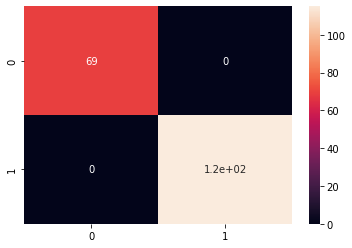

In [48]:
# Performance metrics on training set 

clf =  RandomForestClassifier(n_estimators=n_est_opt ,max_depth=d_opt, random_state=rs_opt) # Call optimum model

true_classes = train_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy of Optimum model on test set before feature engineering: 91.66666666666666% 
F1 score = 0.8936170212765957


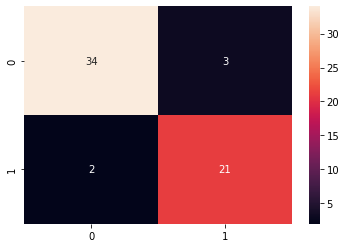

In [49]:
# Evaluate the model

clf = RandomForestClassifier(n_estimators=n_est_opt ,max_depth=d_opt, random_state=rs_opt) # Call optimum model
true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

With Normalization:

In [50]:
# With Normalization of datasets

tr_dataset, test_dataset = Normalize(train_data, test_data) 

In [51]:
# Train the model

n_estimators = [10, 50, 100] # List of num of estimators values for CV
max_depths = [None, 1, 2] # List of max_depth values for CV
random_state = [1] # Random state values

fin_acc, acc_opt, n_est_opt, d_opt, rs_opt = k_CV_RF(tr_dataset, n_estimators=n_estimators,
                                                     max_depths=max_depths, random_state=random_state,
                                                     k=10, drop = 3)

In [52]:
# Print the optimum parameters

print(f"""The optimum model accuracy before feature engineering = {acc_opt*100} % and the optimum hyperparameters are as follows:
    
      Optimum n_estimators = {n_est_opt},
      Optimum Max depth = {d_opt},
      Optimum Random state = {rs_opt}""")

The optimum model accuracy before feature engineering = 91.11111111111111 % and the optimum hyperparameters are as follows:
    
      Optimum n_estimators = 10,
      Optimum Max depth = None,
      Optimum Random state = 1


Performance metrics on training data:
Accuracy of Optimum model before feature engineering: 100.0% 
F1 score = 1.0


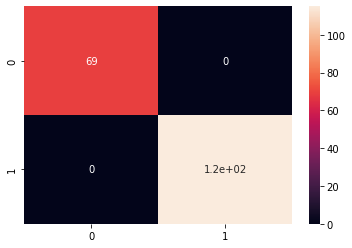

In [53]:
# Performance metrics on training set 

clf =  RandomForestClassifier(n_estimators=n_est_opt ,max_depth=d_opt, random_state=rs_opt) # Call optimum model

true_classes = train_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy of Optimum model on test set before feature engineering: 91.66666666666666% 
F1 score = 0.8936170212765957


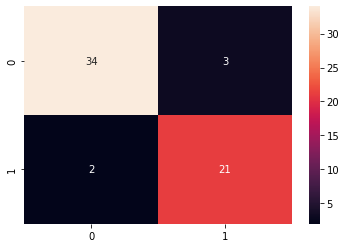

In [54]:
# Evaluate the model

clf = RandomForestClassifier(n_estimators=n_est_opt ,max_depth=d_opt, random_state=rs_opt) # Call optimum model
true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

With Feature engineering:

In [55]:
# Featured data

tr_dataset = new_tr_data
test_dataset = new_test_data

In [56]:
# Train the model

n_estimators = [10, 50, 100] # List of num of estimators values for CV
max_depths = [None, 1, 2] # List of max_depth values for CV
random_state = [1] # Random state values

fin_acc, acc_opt, n_est_opt, d_opt, rs_opt = k_CV_RF(tr_dataset, n_estimators=n_estimators,
                                                     max_depths=max_depths, random_state=random_state,
                                                     k=10, drop = 3)

In [57]:
# Print the optimum parameters

print(f"""The optimum model accuracy after feature engineering = {acc_opt*100} % and the optimum hyperparameters are as follows:
    
      Optimum n_estimators = {n_est_opt},
      Optimum Max depth = {d_opt},
      Optimum Random state = {rs_opt}""")

The optimum model accuracy after feature engineering = 90.55555555555556 % and the optimum hyperparameters are as follows:
    
      Optimum n_estimators = 10,
      Optimum Max depth = 1,
      Optimum Random state = 1


Performance metrics on training data:
Accuracy of Optimum model after feature engineering: 92.26519337016575% 
F1 score = 0.9375


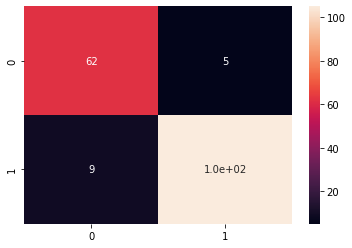

In [58]:
# Performance metrics on training set 

clf = RandomForestClassifier(n_estimators=n_est_opt ,max_depth=d_opt, random_state=rs_opt) # Call optimum model

true_classes = train_data['Classes'][:-3] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model after feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy of Optimum model on test set after feature engineering: 88.33333333333333% 
F1 score = 0.8444444444444444


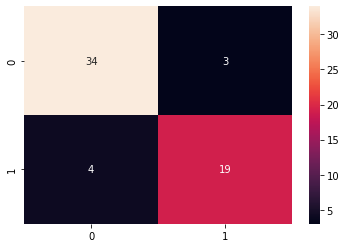

In [59]:
# Evaluate the model

clf = RandomForestClassifier(n_estimators=n_est_opt ,max_depth=d_opt, random_state=rs_opt) # Call optimum model

true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set after feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

# KNN:

In [60]:
# K-fold cross validation for KNN

def k_CV_KNN(dataset, n_neighbors, k=10, drop=3):
    """

    :param dataset: Training dataset (Dataframe)
    :param n_neighbors: List of C values to be evaluated (list of int)
    :param k: num of folds (int, default=10)
    :param drop: Number of samples to be dropped, equal to n_days in add_n_dayavg (default=3)
    :return: fin_acc, acc_opt, n_opt ,i.e, optimum hyperparameters
    """
    n = round(len(dataset) / k) # Length of each batch
    fin_acc = [] # Save final accuracies after each search
    acc_opt = 0 # Initialize optimum accuracy
    n_opt = n_neighbors[0] # Initialize optimum n_neighbors
    
    # Start search
    for n in n_neighbors:

        model = KNeighborsClassifier(n_neighbors=n) # Initialize model
        accuracy = [] # Accuracy per fold
        # Split the data to train and val datasets
        for i in range(0, k):
            val_dataset = dataset.iloc[i * n:(i + 1) * n]
            tr_dataset = dataset.drop(range(i * n, (i + 1) * n))
            if i != 0:
                tr_dataset = tr_dataset.drop(range(i * n - drop, i * n))

            acc, pred_classes = evaluate(model, tr_dataset, val_dataset) # Train and evaluate the modelss
            accuracy.append(acc)
        fin_acc.append(np.mean(accuracy))
        # Update optimum parameters if accuracy improves
        if np.mean(accuracy) > acc_opt:
            acc_opt = np.mean(accuracy)
            n_opt = n

    return fin_acc, acc_opt, n_opt


Without Feature engineering:

In [61]:
# Original dataset

tr_dataset = train_data
test_dataset = test_data

In [62]:
# Train the model

n_neighbors = range(3,11) # List of n_neighbor values for CV
knn_finacc, knn_acc_opt, n_opt1 = k_CV_KNN(train_data, n_neighbors, k=10, drop = 3)

In [63]:
# Print the optimum parameters

print(f"""The optimum model accuracy before feature engineering = {knn_acc_opt*100} % and the optimum hyperparameters are as follows:
    
      Optimum n_neighbors = {n_opt1}""")

The optimum model accuracy before feature engineering = 90.00000000000001 % and the optimum hyperparameters are as follows:
    
      Optimum n_neighbors = 5


Performance metrics on training data:
Accuracy of Optimum model before feature engineering: 89.13043478260869% 
F1 score = 0.9137931034482759


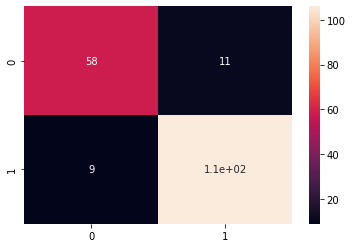

In [64]:
# Performance metrics on training set 

clf = KNeighborsClassifier(n_neighbors=n_opt1) # Call optimum model

true_classes = train_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy of Optimum model on test set before feature engineering: 85.0% 
F1 score = 0.8085106382978724


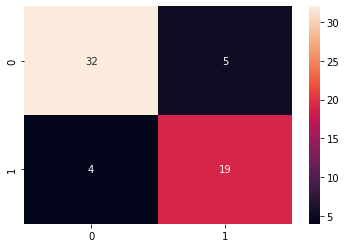

In [65]:
# Evaluate the model 

clf = KNeighborsClassifier(n_neighbors=n_opt1) # Call optimum model

true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

With Normalization:

In [66]:
# With Normalization of datasets

tr_dataset, test_dataset = Normalize(train_data, test_data) 

In [67]:
# Train the model

n_neighbors = range(3,11) # List of n_neighbor values for CV
knn_finacc, knn_acc_opt, n_opt1 = k_CV_KNN(train_data, n_neighbors, k=10, drop = 3)

In [68]:
# Print the optimum parameters

print(f"""The optimum model accuracy before feature engineering = {knn_acc_opt*100} % and the optimum hyperparameters are as follows:
    
      Optimum n_neighbors = {n_opt1}""")

The optimum model accuracy before feature engineering = 90.00000000000001 % and the optimum hyperparameters are as follows:
    
      Optimum n_neighbors = 5


Performance metrics on training data:
Accuracy of Optimum model before feature engineering: 90.76086956521739% 
F1 score = 0.9270386266094419


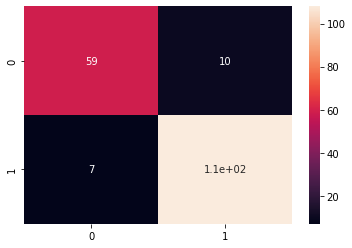

In [69]:
# Performance metrics on training set 

clf = KNeighborsClassifier(n_neighbors=n_opt1) # Call optimum model

true_classes = train_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy of Optimum model on test set before feature engineering: 86.66666666666667% 
F1 score = 0.8181818181818182


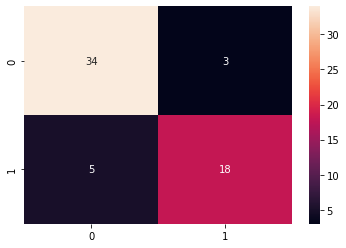

In [70]:
# Evaluate the model 

clf = KNeighborsClassifier(n_neighbors=n_opt1) # Call optimum model

true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

With Feature engineering:

In [71]:
# Featured data

tr_dataset = new_tr_data
test_dataset = new_test_data

In [72]:
# Train the model

n_neighbors = range(3,11) # List of n_neighbor values for CV
knn_finacc, knn_acc_opt, n_opt1 = k_CV_KNN(tr_dataset, n_neighbors, k=10, drop = 3)

In [73]:
# Print the optimum parameters

print(f"""The optimum model accuracy after feature engineering = {knn_acc_opt*100} % and the optimum hyperparameters are as follows:
    
      Optimum n_neighbors = {n_opt1}""")

The optimum model accuracy after feature engineering = 90.0 % and the optimum hyperparameters are as follows:
    
      Optimum n_neighbors = 6


Performance metrics on training data:
Accuracy of Optimum model after feature engineering: 89.50276243093923% 
F1 score = 0.919831223628692


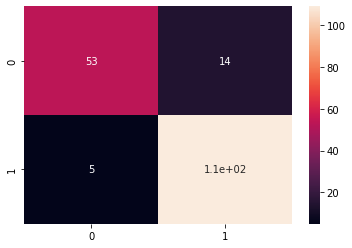

In [74]:
# Performance metrics on training set 

clf = KNeighborsClassifier(n_neighbors=n_opt1) # Call optimum model

true_classes = train_data['Classes'][:-3] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model after feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmapre

Accuracy of Optimum model on test set after feature engineering: 80.0% 
F1 score = 0.7692307692307693


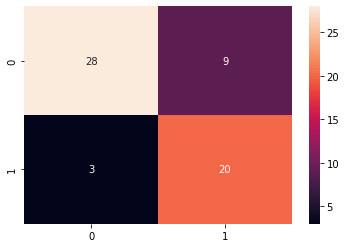

In [75]:
# Evaluate the model 

clf = KNeighborsClassifier(n_neighbors=n_opt1) # Call optimum model
true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set after feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

# MLP:

Without feature engineering and normalization:

In [76]:
# K-fold cross validation for KNN

def k_CV_MLP(dataset, n_hidden_layers, activations, solvers, lr, k=10, drop=3):
    """

    :param dataset: Training dataset (Dataframe)
    :param n_neighbors: List of C values to be evaluated (list of int)
    :param k: num of folds (int, default=10)
    :param drop: Number of samples to be dropped, equal to n_days in add_n_dayavg (default=3)
    :return: fin_acc, acc_opt, n_opt ,i.e, optimum hyperparameters
    """
    n = round(len(dataset) / k) # Length of each batch
    fin_acc = [] # Save final accuracies after each search
    acc_opt = 0 # Initialize optimum accuracy
    n_opt = n_hidden_layers[0] # Initialize optimum n_hidden_layers
    act_opt = activations[0] # Initialize optimum activations
    sol_opt = solvers[0] # Initialize optimum solver
    lr_opt = lr[0] # Initialize optimum learning rate
    
    # Start search
    for nl in n_hidden_layers:
        for act in activations:
            for solver in solvers:
                for l in lr:

                    model = MLPClassifier(random_state=1,hidden_layer_sizes=nl, 
                                          activation=act, solver=solver,
                                          learning_rate_init=l) # Initialize model
                    accuracy = [] # Accuracy per fold
                    # Split the data to train and val datasets
                    for i in range(0, k):
                        val_dataset = dataset.iloc[i * n:(i + 1) * n]
                        tr_dataset = dataset.drop(range(i * n, (i + 1) * n))
                        if i != 0:
                            tr_dataset = tr_dataset.drop(range(i * n - drop, i * n))

                        acc, pred_classes = evaluate(model, tr_dataset, val_dataset) # Train and evaluate the modelss
                        accuracy.append(acc)
                    fin_acc.append(np.mean(accuracy))
                    # Update optimum parameters if accuracy improves
                    if np.mean(accuracy) > acc_opt:
                        acc_opt = np.mean(accuracy)
                        n_opt = nl
                        act_opt = act
                        sol_opt = solver
                        lr_opt = l
    return fin_acc, acc_opt, n_opt, act_opt, sol_opt, lr_opt

In [77]:
# Ignoring warnings as they are lengthening the code PDF

import warnings
warnings.filterwarnings("ignore")

In [78]:
# Original dataset

tr_dataset = train_data
test_dataset = test_data

In [79]:
# Train the model

n_hidden_layers = [5, 10, 20, 50, 100] # List of n_neighbor values for CV
activations = ['relu', 'tanh', 'logistic']
solvers = ['adam', 'sgd']
lr = [1e-1, 1e-3]
fin_acc, acc_opt, n_opt, act_opt, sol_opt, lr_opt = k_CV_MLP(tr_dataset, n_hidden_layers,
                                                             activations, solvers, lr, k=10, drop=3)

In [80]:
# Print the optimum parameters

print(f"""The optimum model accuracy before feature engineering = {acc_opt*100} % and the optimum hyperparameters are as follows:
    
      Optimum n_hidden_layers = {n_opt},
      Optimum activation = {act_opt},
      Optimum solver/optimizer = {sol_opt}
      Optimum LR = {lr_opt}""")

The optimum model accuracy before feature engineering = 92.22222222222223 % and the optimum hyperparameters are as follows:
    
      Optimum n_hidden_layers = 20,
      Optimum activation = relu,
      Optimum solver/optimizer = adam
      Optimum LR = 0.1


Performance metrics on training data:
Accuracy of Optimum model before feature engineering: 95.1086956521739% 
F1 score = 0.961038961038961


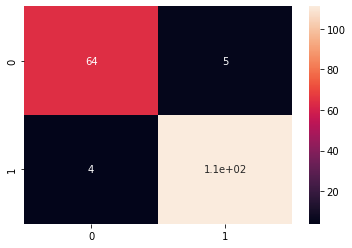

In [81]:
# Performance metrics on training set 

clf =  MLPClassifier(random_state=1,hidden_layer_sizes=n_opt, 
                    activation=act_opt, solver=sol_opt,learning_rate_init=lr_opt) # Call optimum model

true_classes = train_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy of Optimum model on test set before feature engineering: 88.33333333333333% 
F1 score = 0.851063829787234


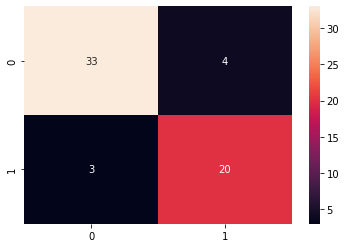

In [82]:
# Evaluate the model 

clf =  MLPClassifier(random_state=1,hidden_layer_sizes=n_opt, 
                    activation=act_opt, solver=sol_opt,learning_rate_init=lr_opt) # Call optimum model

true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

With normalization:

In [83]:
# Normalized datasets

tr_dataset, test_dataset = Normalize(train_data, test_data)

In [84]:
# Train the model

n_hidden_layers = [5, 10, 20, 50, 100] # List of n_neighbor values for CV
activations = ['relu', 'tanh', 'logistic']
solvers = ['adam', 'sgd']
lr = [1e-1, 1e-3]
fin_acc, acc_opt, n_opt, act_opt, sol_opt, lr_opt = k_CV_MLP(tr_dataset, n_hidden_layers,
                                                             activations, solvers, lr, k=10, drop=3)

In [85]:
# Print the optimum parameters

print(f"""The optimum model accuracy before feature engineering = {acc_opt*100} % and the optimum hyperparameters are as follows:
    
      Optimum n_hidden_layers = {n_opt},
      Optimum activation = {act_opt},
      Optimum solver/optimizer = {sol_opt}
      Optimum LR = {lr_opt}""")

The optimum model accuracy before feature engineering = 92.77777777777777 % and the optimum hyperparameters are as follows:
    
      Optimum n_hidden_layers = 50,
      Optimum activation = tanh,
      Optimum solver/optimizer = adam
      Optimum LR = 0.1


Performance metrics on training data:
Accuracy of Optimum model before feature engineering: 100.0% 
F1 score = 1.0


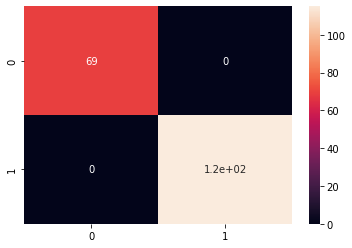

In [86]:
# Performance metrics on training set 

clf =  MLPClassifier(random_state=1,hidden_layer_sizes=n_opt, 
                    activation=act_opt, solver=sol_opt,learning_rate_init=lr_opt) # Call optimum model

true_classes = train_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy of Optimum model on test set before feature engineering: 90.0% 
F1 score = 0.8749999999999999


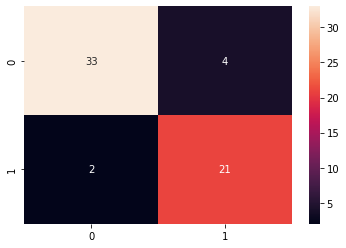

In [87]:
# Evaluate the model 

clf =  MLPClassifier(random_state=1,hidden_layer_sizes=n_opt, 
                    activation=act_opt, solver=sol_opt,learning_rate_init=lr_opt) # Call optimum model

true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set before feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

With Feature engineering:

In [88]:
# Featured data

tr_dataset = new_tr_data
test_dataset = new_test_data

In [89]:
# Train the model

n_hidden_layers = [5, 10, 20, 50, 100] # List of n_neighbor values for CV
activations = ['relu', 'tanh', 'logistic']
solvers = ['adam', 'sgd']
lr = [1e-1, 1e-3]
fin_acc, acc_opt, n_opt, act_opt, sol_opt, lr_opt = k_CV_MLP(tr_dataset, n_hidden_layers,
                                                             activations, solvers, lr, k=10, drop=3)

In [90]:
# Print the optimum parameters

print(f"""The optimum model accuracy after feature engineering = {acc_opt*100} % and the optimum hyperparameters are as follows:
    
      Optimum n_hidden_layers = {n_opt},
      Optimum activation = {act_opt},
      Optimum solver/optimizer = {sol_opt}
      Optimum LR = {lr_opt}""")

The optimum model accuracy after feature engineering = 89.44444444444444 % and the optimum hyperparameters are as follows:
    
      Optimum n_hidden_layers = 10,
      Optimum activation = relu,
      Optimum solver/optimizer = sgd
      Optimum LR = 0.001


Performance metrics on training data:
Accuracy of Optimum model after feature engineering: 92.81767955801105% 
F1 score = 0.9437229437229437


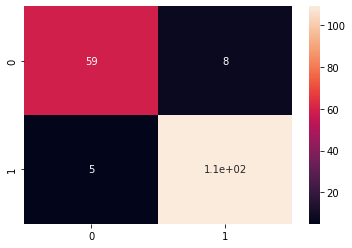

In [91]:
# Performance metrics on training set 

clf =  MLPClassifier(random_state=1,hidden_layer_sizes=n_opt, 
                    activation=act_opt, solver=sol_opt,learning_rate_init=lr_opt) # Call optimum model

true_classes = train_data['Classes'][:-3] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, tr_dataset) # Evaluate the model

print('Performance metrics on training data:')
print(f"Accuracy of Optimum model after feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

Accuracy of Optimum model on test set after feature engineering: 85.0% 
F1 score = 0.8163265306122449


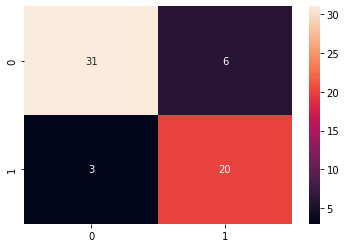

In [92]:
# Evaluate the model 

clf =  MLPClassifier(random_state=1,hidden_layer_sizes=n_opt, 
                    activation=act_opt, solver=sol_opt,learning_rate_init=lr_opt) # Call optimum model

true_classes = test_data['Classes'] # Labels
accuracy, pred_classes = evaluate(clf, tr_dataset, test_dataset) # Evaluate the model

print(f"Accuracy of Optimum model on test set after feature engineering: {accuracy*100}% ") # Final accuracy
print(f'F1 score = {f1_score(true_classes, pred_classes)}') # F1 score
conf_mat = confusion_matrix(true_classes, pred_classes) # Confusion matrix 
heat_map = seaborn.heatmap(conf_mat, annot=True) # Heatmap

# Trivial Classifier:

In [6]:
# Trivial system that outputs class assignments (S1, S2) at random with
# probability N1/N and N2/N, respectively; 𝑁' is the population of data points with class
# label Si, and N is the total population of data points, all based on the training set

X = np.array(train_data.drop(columns=['Date', 'Classes'])) # Input features
y = np.array(train_data['Classes']) # Train Classes
X_test = np.array(test_data.drop(columns=['Date', 'Classes'])) # Input features
y_test = np.array(test_data['Classes']) # Test Classes
dummy_clf = DummyClassifier(strategy="prior") # Call dummy classifier
dummy_clf.fit(X, y) # Train the model
classes = dummy_clf.predict(X_test) # Predictions

print('Performance measures on training set:')
print(f'Train accuracy = {dummy_clf.score(X, y)*100}%')
print(f'F1 score = {f1_score(y, dummy_clf.predict(X))}')
print(f'Confusion matrix = {confusion_matrix(y, dummy_clf.predict(X))}')
print('Performance measures on test set:')
print(f'Test accuracy = {dummy_clf.score(X_test, y_test)*100}%')
print(f'F1 score = {f1_score(y_test, classes)}')
print(f'Confusion matrix = {confusion_matrix(y_test, classes)}')

Performance measures on training set:
Train accuracy = 62.5%
F1 score = 0.7692307692307693
Confusion matrix = [[  0  69]
 [  0 115]]
Performance measures on test set:
Test accuracy = 38.333333333333336%
F1 score = 0.5542168674698795
Confusion matrix = [[ 0 37]
 [ 0 23]]
